In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from tqdm import tqdm

In [ ]:
pip install tensorflow==1.15

     |████████████████████████████████| 412.3MB 37kB/s 
     |████████████████████████████████| 3.8MB 49.3MB/s 
     |████████████████████████████████| 512kB 67.0MB/s 
  Found existing installation: tensorboard 2.1.0
    Uninstalling tensorboard-2.1.0:
      Successfully uninstalled tensorboard-2.1.0
  Found existing installation: tensorflow-estimator 1.15.0
    Uninstalling tensorflow-estimator-1.15.0:
      Successfully uninstalled tensorflow-estimator-1.15.0
  Found existing installation: tensorflow 2.1.0
    Uninstalling tensorflow-2.1.0:
      Successfully uninstalled tensorflow-2.1.0


In [ ]:
from keras.layers import Input
from keras.models import Model, Sequential
from keras.layers.core import Dense, Dropout
from keras.layers.advanced_activations import LeakyReLU
from keras.datasets import mnist
from keras.optimizers import Adam
from keras import initializers
import keras
import tensorflow as tf

Using TensorFlow backend.


In [ ]:
# To make sure that we can reproduce the experiment and get the same results
np.random.seed(10)

# The dimension of our random noise vector.
random_dim = 100

In [ ]:
def load_minst_data():
    # load the data
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    # normalize our inputs to be in the range[-1, 1]
    x_train = (x_train.astype(np.float32) - 127.5)/127.5
    # convert x_train with a shape of (60000, 28, 28) to (60000, 784) so we have
    # 784 columns per row
    x_train = x_train.reshape(60000, 784)
    return (x_train, y_train, x_test, y_test)

In [ ]:
# You will use the Adam optimizer
def get_optimizer():
    return Adam(lr=0.0002, beta_1=0.5)

def get_generator(optimizer):
    generator = Sequential()
    generator.add(Dense(256, input_dim=random_dim, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
    generator.add(LeakyReLU(0.2))

    generator.add(Dense(512))
    generator.add(LeakyReLU(0.2))

    generator.add(Dense(1024))
    generator.add(LeakyReLU(0.2))

    generator.add(Dense(784, activation='tanh'))
    generator.compile(loss='binary_crossentropy', optimizer=optimizer)
    return generator

def get_discriminator(optimizer):
    discriminator = Sequential()
    discriminator.add(Dense(1024, input_dim=784, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))

    discriminator.add(Dense(512))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))

    discriminator.add(Dense(256))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))

    discriminator.add(Dense(1, activation='sigmoid'))
    discriminator.compile(loss='binary_crossentropy', optimizer=optimizer)
    return discriminator

In [ ]:
def get_gan_network(discriminator, random_dim, generator, optimizer):
    # We initially set trainable to False since we only want to train either the
    # generator or discriminator at a time
    discriminator.trainable = False
    # gan input (noise) will be 100-dimensional vectors
    gan_input = Input(shape=(random_dim,))
    # the output of the generator (an image)
    generator.summary()
    x = generator(gan_input)
    # get the output of the discriminator (probability if the image is real or not)
    gan_output = discriminator(x)
    discriminator.summary()
    gan = Model(inputs=gan_input, outputs=gan_output)
    gan.compile(loss='binary_crossentropy', optimizer=optimizer)
    gan.summary()
    return gan

In [ ]:
def plot_generated_images(epoch, generator, examples=100, dim=(10, 10), figsize=(10, 10)):
    noise = np.random.normal(0, 1, size=[examples, random_dim])
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(examples, 28, 28)

    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], interpolation='nearest', cmap='gray_r')
        plt.axis('off')

    plt.tight_layout()
    plt.savefig('gan_generated_image_epoch_%d.png' % epoch)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 784)              

  0%|          | 0/468 [00:00<?, ?it/s]

--------------- Epoch 1 ---------------


  1%|▏         | 7/468 [00:00<00:06, 66.43it/s]

--------------- Epoch 2 ---------------


  2%|▏         | 8/468 [00:00<00:05, 76.95it/s]

--------------- Epoch 3 ---------------


  2%|▏         | 8/468 [00:00<00:06, 72.20it/s]

--------------- Epoch 4 ---------------


  2%|▏         | 8/468 [00:00<00:06, 71.73it/s]

--------------- Epoch 5 ---------------


  2%|▏         | 8/468 [00:00<00:05, 77.53it/s]

--------------- Epoch 6 ---------------


  2%|▏         | 8/468 [00:00<00:05, 76.73it/s]

--------------- Epoch 7 ---------------


  2%|▏         | 8/468 [00:00<00:06, 75.59it/s]

--------------- Epoch 8 ---------------


  2%|▏         | 8/468 [00:00<00:06, 73.78it/s]

--------------- Epoch 9 ---------------


  2%|▏         | 8/468 [00:00<00:06, 74.97it/s]

--------------- Epoch 10 ---------------


  1%|▏         | 7/468 [00:00<00:07, 65.11it/s]

--------------- Epoch 11 ---------------


  1%|▏         | 7/468 [00:00<00:06, 69.57it/s]

--------------- Epoch 12 ---------------


  2%|▏         | 8/468 [00:00<00:06, 76.22it/s]

--------------- Epoch 13 ---------------


  2%|▏         | 8/468 [00:00<00:06, 70.63it/s]

--------------- Epoch 14 ---------------


  2%|▏         | 8/468 [00:00<00:06, 71.29it/s]

--------------- Epoch 15 ---------------


  2%|▏         | 8/468 [00:00<00:06, 72.87it/s]

--------------- Epoch 16 ---------------


  2%|▏         | 8/468 [00:00<00:06, 75.17it/s]

--------------- Epoch 17 ---------------


  1%|▏         | 7/468 [00:00<00:06, 68.48it/s]

--------------- Epoch 18 ---------------


  2%|▏         | 8/468 [00:00<00:06, 72.01it/s]

--------------- Epoch 19 ---------------


  1%|▏         | 7/468 [00:00<00:06, 69.32it/s]

--------------- Epoch 20 ---------------


  1%|▏         | 7/468 [00:00<00:07, 64.03it/s]

--------------- Epoch 21 ---------------


  2%|▏         | 8/468 [00:00<00:06, 72.41it/s]

--------------- Epoch 22 ---------------


  2%|▏         | 8/468 [00:00<00:06, 71.62it/s]

--------------- Epoch 23 ---------------


  2%|▏         | 8/468 [00:00<00:06, 75.27it/s]

--------------- Epoch 24 ---------------


  2%|▏         | 8/468 [00:00<00:06, 75.73it/s]

--------------- Epoch 25 ---------------


  1%|▏         | 7/468 [00:00<00:07, 64.28it/s]

--------------- Epoch 26 ---------------


  2%|▏         | 8/468 [00:00<00:06, 74.47it/s]

--------------- Epoch 27 ---------------


  2%|▏         | 8/468 [00:00<00:05, 78.91it/s]

--------------- Epoch 28 ---------------


  2%|▏         | 8/468 [00:00<00:06, 69.48it/s]

--------------- Epoch 29 ---------------


  2%|▏         | 8/468 [00:00<00:06, 73.92it/s]

--------------- Epoch 30 ---------------


  2%|▏         | 8/468 [00:00<00:05, 78.40it/s]

--------------- Epoch 31 ---------------


  2%|▏         | 8/468 [00:00<00:06, 72.39it/s]

--------------- Epoch 32 ---------------


  2%|▏         | 8/468 [00:00<00:05, 77.92it/s]

--------------- Epoch 33 ---------------


  2%|▏         | 8/468 [00:00<00:06, 74.16it/s]

--------------- Epoch 34 ---------------


  2%|▏         | 8/468 [00:00<00:06, 76.26it/s]

--------------- Epoch 35 ---------------


  2%|▏         | 8/468 [00:00<00:06, 71.67it/s]

--------------- Epoch 36 ---------------


  2%|▏         | 8/468 [00:00<00:06, 71.45it/s]

--------------- Epoch 37 ---------------


  2%|▏         | 8/468 [00:00<00:06, 76.65it/s]

--------------- Epoch 38 ---------------


  2%|▏         | 8/468 [00:00<00:06, 72.56it/s]

--------------- Epoch 39 ---------------


  2%|▏         | 8/468 [00:00<00:06, 75.80it/s]

--------------- Epoch 40 ---------------


  1%|▏         | 7/468 [00:00<00:07, 64.93it/s]

--------------- Epoch 41 ---------------


  2%|▏         | 8/468 [00:00<00:06, 73.64it/s]

--------------- Epoch 42 ---------------


  2%|▏         | 8/468 [00:00<00:06, 71.36it/s]

--------------- Epoch 43 ---------------


  1%|▏         | 7/468 [00:00<00:06, 66.46it/s]

--------------- Epoch 44 ---------------


  2%|▏         | 8/468 [00:00<00:05, 77.47it/s]

--------------- Epoch 45 ---------------


  2%|▏         | 8/468 [00:00<00:06, 75.56it/s]

--------------- Epoch 46 ---------------


  2%|▏         | 8/468 [00:00<00:06, 76.38it/s]

--------------- Epoch 47 ---------------


  2%|▏         | 8/468 [00:00<00:05, 77.01it/s]

--------------- Epoch 48 ---------------


  2%|▏         | 8/468 [00:00<00:06, 72.31it/s]

--------------- Epoch 49 ---------------


  2%|▏         | 8/468 [00:00<00:06, 72.52it/s]

--------------- Epoch 50 ---------------


  2%|▏         | 8/468 [00:00<00:05, 78.29it/s]

--------------- Epoch 51 ---------------


  2%|▏         | 8/468 [00:00<00:06, 71.85it/s]

--------------- Epoch 52 ---------------


  2%|▏         | 8/468 [00:00<00:06, 71.20it/s]

--------------- Epoch 53 ---------------


  2%|▏         | 8/468 [00:00<00:05, 77.22it/s]

--------------- Epoch 54 ---------------


  2%|▏         | 8/468 [00:00<00:06, 72.58it/s]

--------------- Epoch 55 ---------------


  2%|▏         | 8/468 [00:00<00:05, 77.73it/s]

--------------- Epoch 56 ---------------


  1%|▏         | 7/468 [00:00<00:06, 68.16it/s]

--------------- Epoch 57 ---------------


  2%|▏         | 8/468 [00:00<00:06, 75.20it/s]

--------------- Epoch 58 ---------------


  2%|▏         | 8/468 [00:00<00:06, 72.38it/s]

--------------- Epoch 59 ---------------


  2%|▏         | 8/468 [00:00<00:06, 74.66it/s]

--------------- Epoch 60 ---------------


  1%|▏         | 7/468 [00:00<00:06, 67.82it/s]

--------------- Epoch 61 ---------------


  2%|▏         | 8/468 [00:00<00:05, 77.66it/s]

--------------- Epoch 62 ---------------


  2%|▏         | 8/468 [00:00<00:06, 76.32it/s]

--------------- Epoch 63 ---------------


  2%|▏         | 8/468 [00:00<00:06, 73.07it/s]

--------------- Epoch 64 ---------------


  2%|▏         | 8/468 [00:00<00:06, 74.55it/s]

--------------- Epoch 65 ---------------


  1%|▏         | 7/468 [00:00<00:07, 62.37it/s]

--------------- Epoch 66 ---------------


  2%|▏         | 8/468 [00:00<00:06, 76.66it/s]

--------------- Epoch 67 ---------------


  2%|▏         | 8/468 [00:00<00:05, 76.92it/s]

--------------- Epoch 68 ---------------


  2%|▏         | 8/468 [00:00<00:05, 77.80it/s]

--------------- Epoch 69 ---------------


  1%|▏         | 7/468 [00:00<00:07, 62.06it/s]

--------------- Epoch 70 ---------------


  2%|▏         | 8/468 [00:00<00:06, 71.98it/s]

--------------- Epoch 71 ---------------


  2%|▏         | 8/468 [00:00<00:06, 71.74it/s]

--------------- Epoch 72 ---------------


  2%|▏         | 8/468 [00:00<00:06, 75.19it/s]

--------------- Epoch 73 ---------------


  2%|▏         | 8/468 [00:00<00:05, 77.39it/s]

--------------- Epoch 74 ---------------


  2%|▏         | 8/468 [00:00<00:06, 73.69it/s]

--------------- Epoch 75 ---------------


  2%|▏         | 8/468 [00:00<00:05, 78.68it/s]

--------------- Epoch 76 ---------------


  2%|▏         | 8/468 [00:00<00:05, 77.44it/s]

--------------- Epoch 77 ---------------


  2%|▏         | 8/468 [00:00<00:06, 75.60it/s]

--------------- Epoch 78 ---------------


  1%|▏         | 7/468 [00:00<00:07, 63.92it/s]

--------------- Epoch 79 ---------------


  2%|▏         | 8/468 [00:00<00:06, 74.43it/s]

--------------- Epoch 80 ---------------


  1%|▏         | 7/468 [00:00<00:06, 67.01it/s]

--------------- Epoch 81 ---------------


  2%|▏         | 8/468 [00:00<00:06, 75.50it/s]

--------------- Epoch 82 ---------------


  2%|▏         | 8/468 [00:00<00:06, 76.14it/s]

--------------- Epoch 83 ---------------


  2%|▏         | 8/468 [00:00<00:06, 71.14it/s]

--------------- Epoch 84 ---------------


  2%|▏         | 8/468 [00:00<00:06, 76.19it/s]

--------------- Epoch 85 ---------------


  2%|▏         | 8/468 [00:00<00:05, 77.21it/s]

--------------- Epoch 86 ---------------


  2%|▏         | 8/468 [00:00<00:06, 74.61it/s]

--------------- Epoch 87 ---------------


  2%|▏         | 8/468 [00:00<00:05, 78.17it/s]

--------------- Epoch 88 ---------------


  1%|▏         | 7/468 [00:00<00:06, 68.29it/s]

--------------- Epoch 89 ---------------


  2%|▏         | 8/468 [00:00<00:05, 76.99it/s]

--------------- Epoch 90 ---------------


  2%|▏         | 8/468 [00:00<00:06, 75.08it/s]

--------------- Epoch 91 ---------------


  2%|▏         | 8/468 [00:00<00:06, 73.37it/s]

--------------- Epoch 92 ---------------


  2%|▏         | 8/468 [00:00<00:05, 78.16it/s]

--------------- Epoch 93 ---------------


  2%|▏         | 8/468 [00:00<00:06, 75.09it/s]

--------------- Epoch 94 ---------------


  2%|▏         | 8/468 [00:00<00:06, 72.49it/s]

--------------- Epoch 95 ---------------


  1%|▏         | 7/468 [00:00<00:06, 69.41it/s]

--------------- Epoch 96 ---------------


  2%|▏         | 8/468 [00:00<00:05, 76.88it/s]

--------------- Epoch 97 ---------------


  2%|▏         | 8/468 [00:00<00:05, 76.85it/s]

--------------- Epoch 98 ---------------


  1%|▏         | 7/468 [00:00<00:06, 68.35it/s]

--------------- Epoch 99 ---------------


  2%|▏         | 8/468 [00:00<00:05, 77.89it/s]

--------------- Epoch 100 ---------------


  1%|▏         | 7/468 [00:00<00:06, 66.31it/s]

--------------- Epoch 101 ---------------


  2%|▏         | 8/468 [00:00<00:06, 72.59it/s]

--------------- Epoch 102 ---------------


  2%|▏         | 8/468 [00:00<00:05, 76.70it/s]

--------------- Epoch 103 ---------------


  2%|▏         | 8/468 [00:00<00:06, 71.29it/s]

--------------- Epoch 104 ---------------


  2%|▏         | 8/468 [00:00<00:06, 73.99it/s]

--------------- Epoch 105 ---------------


  2%|▏         | 8/468 [00:00<00:06, 75.03it/s]

--------------- Epoch 106 ---------------


  1%|▏         | 7/468 [00:00<00:06, 68.06it/s]

--------------- Epoch 107 ---------------


  1%|▏         | 7/468 [00:00<00:06, 68.85it/s]

--------------- Epoch 108 ---------------


  1%|▏         | 7/468 [00:00<00:06, 67.50it/s]

--------------- Epoch 109 ---------------


  2%|▏         | 8/468 [00:00<00:05, 78.26it/s]

--------------- Epoch 110 ---------------


  2%|▏         | 8/468 [00:00<00:06, 73.95it/s]

--------------- Epoch 111 ---------------


  2%|▏         | 8/468 [00:00<00:06, 76.54it/s]

--------------- Epoch 112 ---------------


  2%|▏         | 8/468 [00:00<00:06, 72.80it/s]

--------------- Epoch 113 ---------------


  1%|▏         | 7/468 [00:00<00:06, 67.62it/s]

--------------- Epoch 114 ---------------


  2%|▏         | 8/468 [00:00<00:05, 76.94it/s]

--------------- Epoch 115 ---------------


  2%|▏         | 8/468 [00:00<00:05, 76.91it/s]

--------------- Epoch 116 ---------------


  2%|▏         | 8/468 [00:00<00:06, 73.91it/s]

--------------- Epoch 117 ---------------


  2%|▏         | 8/468 [00:00<00:05, 76.85it/s]

--------------- Epoch 118 ---------------


  2%|▏         | 8/468 [00:00<00:06, 70.60it/s]

--------------- Epoch 119 ---------------


  2%|▏         | 8/468 [00:00<00:06, 70.54it/s]

--------------- Epoch 120 ---------------


  1%|▏         | 7/468 [00:00<00:07, 63.40it/s]

--------------- Epoch 121 ---------------


  2%|▏         | 8/468 [00:00<00:06, 75.34it/s]

--------------- Epoch 122 ---------------


  2%|▏         | 8/468 [00:00<00:05, 78.33it/s]

--------------- Epoch 123 ---------------


  2%|▏         | 8/468 [00:00<00:06, 74.22it/s]

--------------- Epoch 124 ---------------


  2%|▏         | 8/468 [00:00<00:05, 76.85it/s]

--------------- Epoch 125 ---------------


  2%|▏         | 8/468 [00:00<00:06, 76.59it/s]

--------------- Epoch 126 ---------------


  2%|▏         | 8/468 [00:00<00:05, 77.84it/s]

--------------- Epoch 127 ---------------


  2%|▏         | 8/468 [00:00<00:06, 71.14it/s]

--------------- Epoch 128 ---------------


  2%|▏         | 8/468 [00:00<00:06, 74.79it/s]

--------------- Epoch 129 ---------------


  2%|▏         | 8/468 [00:00<00:05, 77.40it/s]

--------------- Epoch 130 ---------------


  2%|▏         | 8/468 [00:00<00:06, 73.50it/s]

--------------- Epoch 131 ---------------


  2%|▏         | 8/468 [00:00<00:05, 77.10it/s]

--------------- Epoch 132 ---------------


  2%|▏         | 8/468 [00:00<00:05, 76.86it/s]

--------------- Epoch 133 ---------------


  2%|▏         | 8/468 [00:00<00:06, 73.75it/s]

--------------- Epoch 134 ---------------


  2%|▏         | 8/468 [00:00<00:06, 74.19it/s]

--------------- Epoch 135 ---------------


  2%|▏         | 8/468 [00:00<00:05, 77.29it/s]

--------------- Epoch 136 ---------------


  2%|▏         | 8/468 [00:00<00:05, 77.72it/s]

--------------- Epoch 137 ---------------


  2%|▏         | 8/468 [00:00<00:05, 79.67it/s]

--------------- Epoch 138 ---------------


  2%|▏         | 8/468 [00:00<00:06, 73.67it/s]

--------------- Epoch 139 ---------------


  2%|▏         | 8/468 [00:00<00:05, 78.90it/s]

--------------- Epoch 140 ---------------


  1%|▏         | 7/468 [00:00<00:06, 66.61it/s]

--------------- Epoch 141 ---------------


  2%|▏         | 8/468 [00:00<00:05, 76.95it/s]

--------------- Epoch 142 ---------------


  1%|▏         | 7/468 [00:00<00:06, 69.73it/s]

--------------- Epoch 143 ---------------


  2%|▏         | 8/468 [00:00<00:05, 77.15it/s]

--------------- Epoch 144 ---------------


  1%|▏         | 7/468 [00:00<00:06, 66.73it/s]

--------------- Epoch 145 ---------------


  2%|▏         | 8/468 [00:00<00:05, 76.67it/s]

--------------- Epoch 146 ---------------


  2%|▏         | 8/468 [00:00<00:06, 72.37it/s]

--------------- Epoch 147 ---------------


  2%|▏         | 8/468 [00:00<00:06, 76.05it/s]

--------------- Epoch 148 ---------------


  2%|▏         | 8/468 [00:00<00:06, 75.05it/s]

--------------- Epoch 149 ---------------


  2%|▏         | 8/468 [00:00<00:05, 78.81it/s]

--------------- Epoch 150 ---------------


  2%|▏         | 8/468 [00:00<00:06, 74.17it/s]

--------------- Epoch 151 ---------------


  2%|▏         | 8/468 [00:00<00:06, 75.39it/s]

--------------- Epoch 152 ---------------


  2%|▏         | 8/468 [00:00<00:06, 74.01it/s]

--------------- Epoch 153 ---------------


  1%|▏         | 7/468 [00:00<00:06, 66.57it/s]

--------------- Epoch 154 ---------------


  2%|▏         | 8/468 [00:00<00:05, 77.81it/s]

--------------- Epoch 155 ---------------


  1%|▏         | 7/468 [00:00<00:06, 68.23it/s]

--------------- Epoch 156 ---------------


  2%|▏         | 8/468 [00:00<00:06, 75.09it/s]

--------------- Epoch 157 ---------------


  2%|▏         | 8/468 [00:00<00:06, 75.74it/s]

--------------- Epoch 158 ---------------


  2%|▏         | 8/468 [00:00<00:06, 73.15it/s]

--------------- Epoch 159 ---------------


  1%|▏         | 7/468 [00:00<00:06, 66.01it/s]

--------------- Epoch 160 ---------------


  1%|▏         | 7/468 [00:00<00:07, 62.06it/s]

--------------- Epoch 161 ---------------


  2%|▏         | 8/468 [00:00<00:06, 73.61it/s]

--------------- Epoch 162 ---------------


  2%|▏         | 8/468 [00:00<00:06, 76.39it/s]

--------------- Epoch 163 ---------------


  2%|▏         | 8/468 [00:00<00:06, 73.47it/s]

--------------- Epoch 164 ---------------


  2%|▏         | 8/468 [00:00<00:05, 78.87it/s]

--------------- Epoch 165 ---------------


  1%|▏         | 7/468 [00:00<00:07, 64.98it/s]

--------------- Epoch 166 ---------------


  2%|▏         | 8/468 [00:00<00:06, 73.98it/s]

--------------- Epoch 167 ---------------


  2%|▏         | 8/468 [00:00<00:05, 76.80it/s]

--------------- Epoch 168 ---------------


  1%|▏         | 7/468 [00:00<00:06, 69.40it/s]

--------------- Epoch 169 ---------------


  2%|▏         | 8/468 [00:00<00:05, 76.67it/s]

--------------- Epoch 170 ---------------


  2%|▏         | 8/468 [00:00<00:06, 73.12it/s]

--------------- Epoch 171 ---------------


  2%|▏         | 8/468 [00:00<00:06, 72.03it/s]

--------------- Epoch 172 ---------------


  2%|▏         | 8/468 [00:00<00:06, 76.31it/s]

--------------- Epoch 173 ---------------


  2%|▏         | 8/468 [00:00<00:05, 77.19it/s]

--------------- Epoch 174 ---------------


  2%|▏         | 8/468 [00:00<00:06, 70.34it/s]

--------------- Epoch 175 ---------------


  2%|▏         | 8/468 [00:00<00:05, 78.64it/s]

--------------- Epoch 176 ---------------


  2%|▏         | 8/468 [00:00<00:06, 72.13it/s]

--------------- Epoch 177 ---------------


  2%|▏         | 8/468 [00:00<00:06, 69.76it/s]

--------------- Epoch 178 ---------------


  2%|▏         | 8/468 [00:00<00:05, 79.21it/s]

--------------- Epoch 179 ---------------


  2%|▏         | 8/468 [00:00<00:05, 77.86it/s]

--------------- Epoch 180 ---------------


  1%|▏         | 7/468 [00:00<00:07, 64.48it/s]

--------------- Epoch 181 ---------------


  2%|▏         | 8/468 [00:00<00:06, 74.23it/s]

--------------- Epoch 182 ---------------


  2%|▏         | 8/468 [00:00<00:05, 76.79it/s]

--------------- Epoch 183 ---------------


  2%|▏         | 8/468 [00:00<00:06, 72.45it/s]

--------------- Epoch 184 ---------------


  2%|▏         | 8/468 [00:00<00:05, 77.81it/s]

--------------- Epoch 185 ---------------


  2%|▏         | 8/468 [00:00<00:05, 77.40it/s]

--------------- Epoch 186 ---------------


  1%|▏         | 7/468 [00:00<00:06, 68.43it/s]

--------------- Epoch 187 ---------------


  2%|▏         | 8/468 [00:00<00:06, 73.37it/s]

--------------- Epoch 188 ---------------


  2%|▏         | 8/468 [00:00<00:05, 77.49it/s]

--------------- Epoch 189 ---------------


  2%|▏         | 8/468 [00:00<00:05, 79.05it/s]

--------------- Epoch 190 ---------------


  2%|▏         | 8/468 [00:00<00:06, 74.57it/s]

--------------- Epoch 191 ---------------


  2%|▏         | 8/468 [00:00<00:06, 74.47it/s]

--------------- Epoch 192 ---------------


  2%|▏         | 8/468 [00:00<00:06, 72.05it/s]

--------------- Epoch 193 ---------------


  2%|▏         | 8/468 [00:00<00:05, 77.21it/s]

--------------- Epoch 194 ---------------


  2%|▏         | 8/468 [00:00<00:06, 76.53it/s]

--------------- Epoch 195 ---------------


  2%|▏         | 8/468 [00:00<00:06, 74.91it/s]

--------------- Epoch 196 ---------------


  2%|▏         | 8/468 [00:00<00:06, 71.72it/s]

--------------- Epoch 197 ---------------


  2%|▏         | 8/468 [00:00<00:05, 77.73it/s]

--------------- Epoch 198 ---------------


  2%|▏         | 8/468 [00:00<00:06, 72.01it/s]

--------------- Epoch 199 ---------------


  2%|▏         | 8/468 [00:00<00:06, 74.04it/s]

--------------- Epoch 200 ---------------


  1%|▏         | 7/468 [00:00<00:07, 60.73it/s]

--------------- Epoch 201 ---------------


  2%|▏         | 8/468 [00:00<00:06, 70.86it/s]

--------------- Epoch 202 ---------------


  2%|▏         | 8/468 [00:00<00:06, 75.18it/s]

--------------- Epoch 203 ---------------


  2%|▏         | 8/468 [00:00<00:06, 73.43it/s]

--------------- Epoch 204 ---------------


  2%|▏         | 8/468 [00:00<00:05, 78.43it/s]

--------------- Epoch 205 ---------------


  2%|▏         | 8/468 [00:00<00:06, 72.57it/s]

--------------- Epoch 206 ---------------


  1%|▏         | 7/468 [00:00<00:06, 69.97it/s]

--------------- Epoch 207 ---------------


  2%|▏         | 8/468 [00:00<00:05, 78.06it/s]

--------------- Epoch 208 ---------------


  2%|▏         | 8/468 [00:00<00:06, 76.66it/s]

--------------- Epoch 209 ---------------


  2%|▏         | 8/468 [00:00<00:06, 71.93it/s]

--------------- Epoch 210 ---------------


  2%|▏         | 8/468 [00:00<00:06, 71.41it/s]

--------------- Epoch 211 ---------------


  2%|▏         | 8/468 [00:00<00:05, 78.98it/s]

--------------- Epoch 212 ---------------


  2%|▏         | 8/468 [00:00<00:06, 76.28it/s]

--------------- Epoch 213 ---------------


  2%|▏         | 8/468 [00:00<00:05, 77.87it/s]

--------------- Epoch 214 ---------------


  2%|▏         | 8/468 [00:00<00:06, 76.59it/s]

--------------- Epoch 215 ---------------


  2%|▏         | 8/468 [00:00<00:06, 76.34it/s]

--------------- Epoch 216 ---------------


  2%|▏         | 9/468 [00:00<00:05, 80.29it/s]

--------------- Epoch 217 ---------------


  2%|▏         | 8/468 [00:00<00:06, 72.78it/s]

--------------- Epoch 218 ---------------


  2%|▏         | 8/468 [00:00<00:06, 70.64it/s]

--------------- Epoch 219 ---------------


  2%|▏         | 8/468 [00:00<00:06, 71.16it/s]

--------------- Epoch 220 ---------------


  1%|▏         | 7/468 [00:00<00:06, 67.44it/s]

--------------- Epoch 221 ---------------


  2%|▏         | 8/468 [00:00<00:06, 76.43it/s]

--------------- Epoch 222 ---------------


  2%|▏         | 8/468 [00:00<00:05, 78.84it/s]

--------------- Epoch 223 ---------------


  1%|▏         | 7/468 [00:00<00:06, 67.12it/s]

--------------- Epoch 224 ---------------


  2%|▏         | 8/468 [00:00<00:06, 75.71it/s]

--------------- Epoch 225 ---------------


  2%|▏         | 8/468 [00:00<00:05, 76.80it/s]

--------------- Epoch 226 ---------------


  2%|▏         | 8/468 [00:00<00:05, 78.87it/s]

--------------- Epoch 227 ---------------


  2%|▏         | 8/468 [00:00<00:06, 75.38it/s]

--------------- Epoch 228 ---------------


  2%|▏         | 8/468 [00:00<00:06, 75.62it/s]

--------------- Epoch 229 ---------------


  2%|▏         | 8/468 [00:00<00:06, 72.37it/s]

--------------- Epoch 230 ---------------


  2%|▏         | 8/468 [00:00<00:05, 77.26it/s]

--------------- Epoch 231 ---------------


  2%|▏         | 8/468 [00:00<00:05, 76.73it/s]

--------------- Epoch 232 ---------------


  2%|▏         | 8/468 [00:00<00:06, 74.04it/s]

--------------- Epoch 233 ---------------


  2%|▏         | 8/468 [00:00<00:06, 76.59it/s]

--------------- Epoch 234 ---------------


  2%|▏         | 8/468 [00:00<00:06, 76.15it/s]

--------------- Epoch 235 ---------------


  2%|▏         | 8/468 [00:00<00:06, 76.12it/s]

--------------- Epoch 236 ---------------


  2%|▏         | 8/468 [00:00<00:06, 71.02it/s]

--------------- Epoch 237 ---------------


  2%|▏         | 8/468 [00:00<00:05, 78.02it/s]

--------------- Epoch 238 ---------------


  2%|▏         | 8/468 [00:00<00:05, 78.82it/s]

--------------- Epoch 239 ---------------


  2%|▏         | 8/468 [00:00<00:06, 72.60it/s]

--------------- Epoch 240 ---------------


  1%|▏         | 7/468 [00:00<00:07, 63.40it/s]

--------------- Epoch 241 ---------------


  2%|▏         | 8/468 [00:00<00:06, 72.11it/s]

--------------- Epoch 242 ---------------


  2%|▏         | 8/468 [00:00<00:06, 72.01it/s]

--------------- Epoch 243 ---------------


  2%|▏         | 8/468 [00:00<00:06, 72.39it/s]

--------------- Epoch 244 ---------------


  2%|▏         | 8/468 [00:00<00:06, 76.19it/s]

--------------- Epoch 245 ---------------


  2%|▏         | 8/468 [00:00<00:06, 74.53it/s]

--------------- Epoch 246 ---------------


  2%|▏         | 8/468 [00:00<00:05, 78.36it/s]

--------------- Epoch 247 ---------------


  2%|▏         | 8/468 [00:00<00:06, 68.26it/s]

--------------- Epoch 248 ---------------


  2%|▏         | 8/468 [00:00<00:06, 72.64it/s]

--------------- Epoch 249 ---------------


  1%|▏         | 7/468 [00:00<00:06, 67.29it/s]

--------------- Epoch 250 ---------------


  2%|▏         | 8/468 [00:00<00:06, 73.93it/s]

--------------- Epoch 251 ---------------


  2%|▏         | 8/468 [00:00<00:06, 75.83it/s]

--------------- Epoch 252 ---------------


  2%|▏         | 8/468 [00:00<00:06, 71.39it/s]

--------------- Epoch 253 ---------------


  2%|▏         | 9/468 [00:00<00:05, 80.29it/s]

--------------- Epoch 254 ---------------


  1%|▏         | 7/468 [00:00<00:06, 69.17it/s]

--------------- Epoch 255 ---------------


  2%|▏         | 8/468 [00:00<00:06, 73.02it/s]

--------------- Epoch 256 ---------------


  2%|▏         | 8/468 [00:00<00:06, 75.45it/s]

--------------- Epoch 257 ---------------


  2%|▏         | 8/468 [00:00<00:06, 73.26it/s]

--------------- Epoch 258 ---------------


  2%|▏         | 8/468 [00:00<00:05, 77.87it/s]

--------------- Epoch 259 ---------------


  2%|▏         | 8/468 [00:00<00:06, 71.68it/s]

--------------- Epoch 260 ---------------


  1%|▏         | 7/468 [00:00<00:07, 64.10it/s]

--------------- Epoch 261 ---------------


  2%|▏         | 8/468 [00:00<00:05, 77.91it/s]

--------------- Epoch 262 ---------------


  2%|▏         | 8/468 [00:00<00:05, 78.09it/s]

--------------- Epoch 263 ---------------


  2%|▏         | 8/468 [00:00<00:05, 77.01it/s]

--------------- Epoch 264 ---------------


  1%|▏         | 7/468 [00:00<00:06, 68.55it/s]

--------------- Epoch 265 ---------------


  2%|▏         | 8/468 [00:00<00:05, 76.72it/s]

--------------- Epoch 266 ---------------


  2%|▏         | 8/468 [00:00<00:06, 75.57it/s]

--------------- Epoch 267 ---------------


  1%|▏         | 7/468 [00:00<00:06, 69.77it/s]

--------------- Epoch 268 ---------------


  2%|▏         | 8/468 [00:00<00:06, 72.84it/s]

--------------- Epoch 269 ---------------


  2%|▏         | 8/468 [00:00<00:05, 77.14it/s]

--------------- Epoch 270 ---------------


  2%|▏         | 8/468 [00:00<00:06, 75.37it/s]

--------------- Epoch 271 ---------------


  2%|▏         | 8/468 [00:00<00:06, 72.41it/s]

--------------- Epoch 272 ---------------


  2%|▏         | 8/468 [00:00<00:06, 75.03it/s]

--------------- Epoch 273 ---------------


  2%|▏         | 8/468 [00:00<00:06, 73.99it/s]

--------------- Epoch 274 ---------------


  2%|▏         | 8/468 [00:00<00:06, 73.60it/s]

--------------- Epoch 275 ---------------


  2%|▏         | 8/468 [00:00<00:05, 77.04it/s]

--------------- Epoch 276 ---------------


  2%|▏         | 8/468 [00:00<00:06, 74.10it/s]

--------------- Epoch 277 ---------------


  2%|▏         | 8/468 [00:00<00:06, 71.92it/s]

--------------- Epoch 278 ---------------


  2%|▏         | 8/468 [00:00<00:06, 70.79it/s]

--------------- Epoch 279 ---------------


  2%|▏         | 8/468 [00:00<00:05, 77.09it/s]

--------------- Epoch 280 ---------------


  1%|▏         | 7/468 [00:00<00:07, 65.03it/s]

--------------- Epoch 281 ---------------


  2%|▏         | 8/468 [00:00<00:06, 71.94it/s]

--------------- Epoch 282 ---------------


  2%|▏         | 8/468 [00:00<00:06, 72.40it/s]

--------------- Epoch 283 ---------------


  2%|▏         | 8/468 [00:00<00:05, 78.36it/s]

--------------- Epoch 284 ---------------


  2%|▏         | 8/468 [00:00<00:05, 77.34it/s]

--------------- Epoch 285 ---------------


  1%|▏         | 7/468 [00:00<00:07, 63.73it/s]

--------------- Epoch 286 ---------------


  2%|▏         | 8/468 [00:00<00:06, 71.73it/s]

--------------- Epoch 287 ---------------


  2%|▏         | 8/468 [00:00<00:06, 76.18it/s]

--------------- Epoch 288 ---------------


  2%|▏         | 8/468 [00:00<00:06, 71.51it/s]

--------------- Epoch 289 ---------------


  2%|▏         | 8/468 [00:00<00:06, 75.09it/s]

--------------- Epoch 290 ---------------


  2%|▏         | 8/468 [00:00<00:06, 75.30it/s]

--------------- Epoch 291 ---------------


  2%|▏         | 8/468 [00:00<00:06, 75.08it/s]

--------------- Epoch 292 ---------------


  1%|▏         | 7/468 [00:00<00:06, 68.11it/s]

--------------- Epoch 293 ---------------


  2%|▏         | 8/468 [00:00<00:06, 72.03it/s]

--------------- Epoch 294 ---------------


  2%|▏         | 8/468 [00:00<00:06, 76.17it/s]

--------------- Epoch 295 ---------------


  2%|▏         | 8/468 [00:00<00:06, 70.31it/s]

--------------- Epoch 296 ---------------


  1%|▏         | 7/468 [00:00<00:07, 65.75it/s]

--------------- Epoch 297 ---------------


  2%|▏         | 8/468 [00:00<00:05, 77.68it/s]

--------------- Epoch 298 ---------------


  2%|▏         | 8/468 [00:00<00:06, 72.44it/s]

--------------- Epoch 299 ---------------


  2%|▏         | 8/468 [00:00<00:05, 77.29it/s]

--------------- Epoch 300 ---------------


  1%|▏         | 7/468 [00:00<00:07, 65.47it/s]

--------------- Epoch 301 ---------------


  2%|▏         | 8/468 [00:00<00:06, 74.58it/s]

--------------- Epoch 302 ---------------


  2%|▏         | 8/468 [00:00<00:05, 77.44it/s]

--------------- Epoch 303 ---------------


  1%|▏         | 7/468 [00:00<00:06, 68.81it/s]

--------------- Epoch 304 ---------------


  2%|▏         | 8/468 [00:00<00:05, 78.53it/s]

--------------- Epoch 305 ---------------


  2%|▏         | 8/468 [00:00<00:06, 73.73it/s]

--------------- Epoch 306 ---------------


  2%|▏         | 8/468 [00:00<00:05, 78.62it/s]

--------------- Epoch 307 ---------------


  2%|▏         | 8/468 [00:00<00:06, 73.79it/s]

--------------- Epoch 308 ---------------


  2%|▏         | 8/468 [00:00<00:05, 78.81it/s]

--------------- Epoch 309 ---------------


  2%|▏         | 8/468 [00:00<00:05, 79.43it/s]

--------------- Epoch 310 ---------------


  2%|▏         | 8/468 [00:00<00:05, 78.84it/s]

--------------- Epoch 311 ---------------


  2%|▏         | 8/468 [00:00<00:06, 74.37it/s]

--------------- Epoch 312 ---------------


  2%|▏         | 8/468 [00:00<00:06, 74.42it/s]

--------------- Epoch 313 ---------------


  2%|▏         | 8/468 [00:00<00:06, 73.25it/s]

--------------- Epoch 314 ---------------


  2%|▏         | 8/468 [00:00<00:05, 77.34it/s]

--------------- Epoch 315 ---------------


  2%|▏         | 8/468 [00:00<00:06, 74.57it/s]

--------------- Epoch 316 ---------------


  2%|▏         | 8/468 [00:00<00:06, 74.59it/s]

--------------- Epoch 317 ---------------


  1%|▏         | 7/468 [00:00<00:06, 69.48it/s]

--------------- Epoch 318 ---------------


  2%|▏         | 8/468 [00:00<00:06, 70.79it/s]

--------------- Epoch 319 ---------------


  1%|▏         | 7/468 [00:00<00:06, 69.64it/s]

--------------- Epoch 320 ---------------


  1%|▏         | 7/468 [00:00<00:06, 66.85it/s]

--------------- Epoch 321 ---------------


  2%|▏         | 8/468 [00:00<00:05, 78.01it/s]

--------------- Epoch 322 ---------------


  2%|▏         | 8/468 [00:00<00:05, 78.99it/s]

--------------- Epoch 323 ---------------


  2%|▏         | 8/468 [00:00<00:05, 79.19it/s]

--------------- Epoch 324 ---------------


  2%|▏         | 8/468 [00:00<00:06, 76.03it/s]

--------------- Epoch 325 ---------------


  2%|▏         | 8/468 [00:00<00:05, 76.71it/s]

--------------- Epoch 326 ---------------


  2%|▏         | 8/468 [00:00<00:05, 77.71it/s]

--------------- Epoch 327 ---------------


  2%|▏         | 8/468 [00:00<00:06, 75.51it/s]

--------------- Epoch 328 ---------------


  2%|▏         | 8/468 [00:00<00:05, 77.46it/s]

--------------- Epoch 329 ---------------


  2%|▏         | 8/468 [00:00<00:05, 77.33it/s]

--------------- Epoch 330 ---------------


  2%|▏         | 8/468 [00:00<00:06, 72.49it/s]

--------------- Epoch 331 ---------------


  2%|▏         | 8/468 [00:00<00:05, 77.24it/s]

--------------- Epoch 332 ---------------


  2%|▏         | 8/468 [00:00<00:05, 77.20it/s]

--------------- Epoch 333 ---------------


  2%|▏         | 8/468 [00:00<00:05, 77.07it/s]

--------------- Epoch 334 ---------------


  2%|▏         | 8/468 [00:00<00:06, 73.61it/s]

--------------- Epoch 335 ---------------


  2%|▏         | 8/468 [00:00<00:05, 78.58it/s]

--------------- Epoch 336 ---------------


  2%|▏         | 8/468 [00:00<00:06, 75.71it/s]

--------------- Epoch 337 ---------------


  2%|▏         | 8/468 [00:00<00:06, 75.07it/s]

--------------- Epoch 338 ---------------


  2%|▏         | 8/468 [00:00<00:06, 72.54it/s]

--------------- Epoch 339 ---------------


  2%|▏         | 8/468 [00:00<00:05, 79.28it/s]

--------------- Epoch 340 ---------------


  1%|▏         | 7/468 [00:00<00:07, 61.92it/s]

--------------- Epoch 341 ---------------


  1%|▏         | 7/468 [00:00<00:06, 69.87it/s]

--------------- Epoch 342 ---------------


  2%|▏         | 8/468 [00:00<00:05, 77.29it/s]

--------------- Epoch 343 ---------------


  2%|▏         | 8/468 [00:00<00:06, 72.89it/s]

--------------- Epoch 344 ---------------


  2%|▏         | 8/468 [00:00<00:06, 75.36it/s]

--------------- Epoch 345 ---------------


  2%|▏         | 8/468 [00:00<00:05, 77.44it/s]

--------------- Epoch 346 ---------------


  2%|▏         | 8/468 [00:00<00:06, 75.97it/s]

--------------- Epoch 347 ---------------


  2%|▏         | 8/468 [00:00<00:06, 74.67it/s]

--------------- Epoch 348 ---------------


  1%|▏         | 7/468 [00:00<00:07, 65.60it/s]

--------------- Epoch 349 ---------------


  2%|▏         | 8/468 [00:00<00:06, 71.99it/s]

--------------- Epoch 350 ---------------


  1%|▏         | 7/468 [00:00<00:06, 69.87it/s]

--------------- Epoch 351 ---------------


  2%|▏         | 8/468 [00:00<00:06, 75.96it/s]

--------------- Epoch 352 ---------------


  1%|▏         | 7/468 [00:00<00:06, 68.49it/s]

--------------- Epoch 353 ---------------


  2%|▏         | 8/468 [00:00<00:06, 70.93it/s]

--------------- Epoch 354 ---------------


  2%|▏         | 8/468 [00:00<00:06, 76.21it/s]

--------------- Epoch 355 ---------------


  2%|▏         | 8/468 [00:00<00:06, 73.05it/s]

--------------- Epoch 356 ---------------


  2%|▏         | 8/468 [00:00<00:06, 72.32it/s]

--------------- Epoch 357 ---------------


  2%|▏         | 8/468 [00:00<00:06, 75.15it/s]

--------------- Epoch 358 ---------------


  2%|▏         | 8/468 [00:00<00:06, 71.64it/s]

--------------- Epoch 359 ---------------


  2%|▏         | 8/468 [00:00<00:05, 77.79it/s]

--------------- Epoch 360 ---------------


  1%|▏         | 7/468 [00:00<00:06, 66.99it/s]

--------------- Epoch 361 ---------------


  2%|▏         | 8/468 [00:00<00:05, 76.93it/s]

--------------- Epoch 362 ---------------


  2%|▏         | 8/468 [00:00<00:06, 73.18it/s]

--------------- Epoch 363 ---------------


  2%|▏         | 8/468 [00:00<00:05, 78.09it/s]

--------------- Epoch 364 ---------------


  2%|▏         | 8/468 [00:00<00:06, 69.32it/s]

--------------- Epoch 365 ---------------


  2%|▏         | 8/468 [00:00<00:05, 78.46it/s]

--------------- Epoch 366 ---------------


  2%|▏         | 8/468 [00:00<00:05, 77.47it/s]

--------------- Epoch 367 ---------------


  2%|▏         | 8/468 [00:00<00:06, 71.63it/s]

--------------- Epoch 368 ---------------


  2%|▏         | 8/468 [00:00<00:06, 76.36it/s]

--------------- Epoch 369 ---------------


  2%|▏         | 8/468 [00:00<00:06, 70.52it/s]

--------------- Epoch 370 ---------------


  2%|▏         | 8/468 [00:00<00:05, 77.54it/s]

--------------- Epoch 371 ---------------


  2%|▏         | 8/468 [00:00<00:06, 76.04it/s]

--------------- Epoch 372 ---------------


  1%|▏         | 7/468 [00:00<00:06, 67.46it/s]

--------------- Epoch 373 ---------------


  2%|▏         | 8/468 [00:00<00:05, 77.40it/s]

--------------- Epoch 374 ---------------


  2%|▏         | 8/468 [00:00<00:06, 74.91it/s]

--------------- Epoch 375 ---------------


  2%|▏         | 8/468 [00:00<00:06, 70.71it/s]

--------------- Epoch 376 ---------------


  2%|▏         | 8/468 [00:00<00:05, 77.15it/s]

--------------- Epoch 377 ---------------


  1%|▏         | 7/468 [00:00<00:07, 64.97it/s]

--------------- Epoch 378 ---------------


  2%|▏         | 8/468 [00:00<00:06, 72.97it/s]

--------------- Epoch 379 ---------------


  2%|▏         | 8/468 [00:00<00:06, 76.47it/s]

--------------- Epoch 380 ---------------


  1%|▏         | 7/468 [00:00<00:07, 63.48it/s]

--------------- Epoch 381 ---------------


  2%|▏         | 8/468 [00:00<00:05, 78.12it/s]

--------------- Epoch 382 ---------------


  2%|▏         | 8/468 [00:00<00:05, 77.41it/s]

--------------- Epoch 383 ---------------


  2%|▏         | 8/468 [00:00<00:06, 75.84it/s]

--------------- Epoch 384 ---------------


  2%|▏         | 8/468 [00:00<00:06, 71.99it/s]

--------------- Epoch 385 ---------------


  1%|▏         | 7/468 [00:00<00:06, 69.70it/s]

--------------- Epoch 386 ---------------


  2%|▏         | 8/468 [00:00<00:06, 71.17it/s]

--------------- Epoch 387 ---------------


  2%|▏         | 8/468 [00:00<00:05, 77.91it/s]

--------------- Epoch 388 ---------------


  2%|▏         | 8/468 [00:00<00:05, 76.78it/s]

--------------- Epoch 389 ---------------


  2%|▏         | 8/468 [00:00<00:06, 75.54it/s]

--------------- Epoch 390 ---------------


  2%|▏         | 8/468 [00:00<00:06, 71.83it/s]

--------------- Epoch 391 ---------------


  1%|▏         | 7/468 [00:00<00:06, 69.37it/s]

--------------- Epoch 392 ---------------


  2%|▏         | 8/468 [00:00<00:06, 68.95it/s]

--------------- Epoch 393 ---------------


  2%|▏         | 8/468 [00:00<00:05, 77.44it/s]

--------------- Epoch 394 ---------------


  2%|▏         | 8/468 [00:00<00:06, 74.48it/s]

--------------- Epoch 395 ---------------


  2%|▏         | 8/468 [00:00<00:06, 75.01it/s]

--------------- Epoch 396 ---------------


  1%|▏         | 7/468 [00:00<00:07, 64.82it/s]

--------------- Epoch 397 ---------------


  2%|▏         | 8/468 [00:00<00:06, 70.41it/s]

--------------- Epoch 398 ---------------


  2%|▏         | 8/468 [00:00<00:06, 74.74it/s]

--------------- Epoch 399 ---------------


  2%|▏         | 8/468 [00:00<00:05, 76.88it/s]

--------------- Epoch 400 ---------------


100%|██████████| 468/468 [00:06<00:00, 73.92it/s]


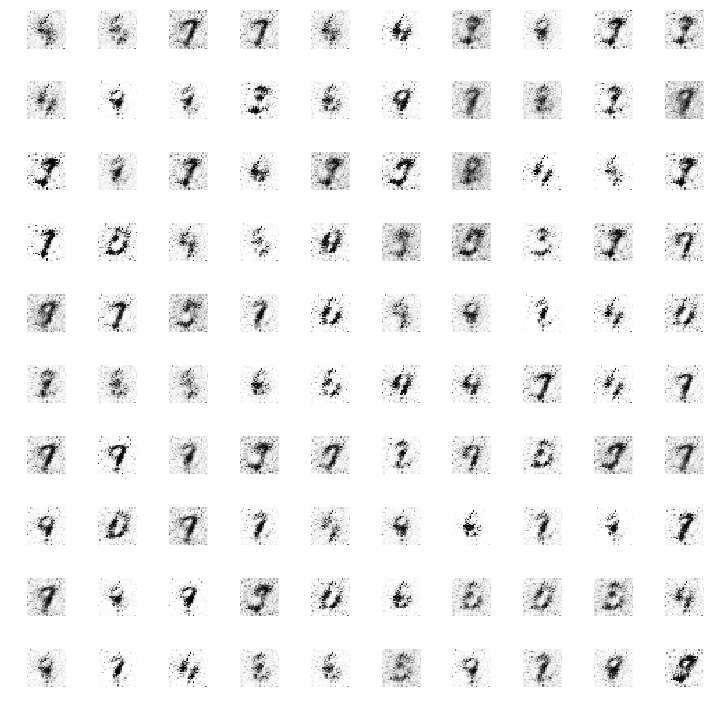

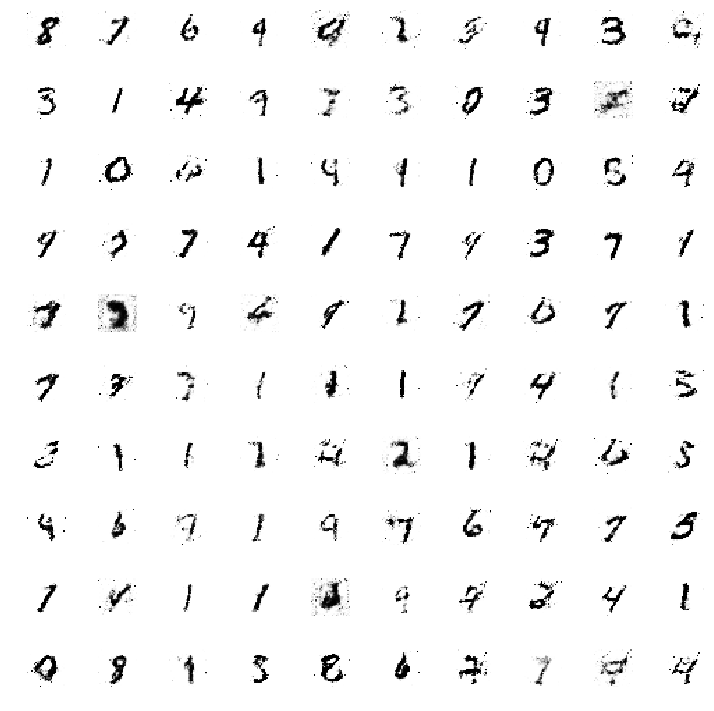

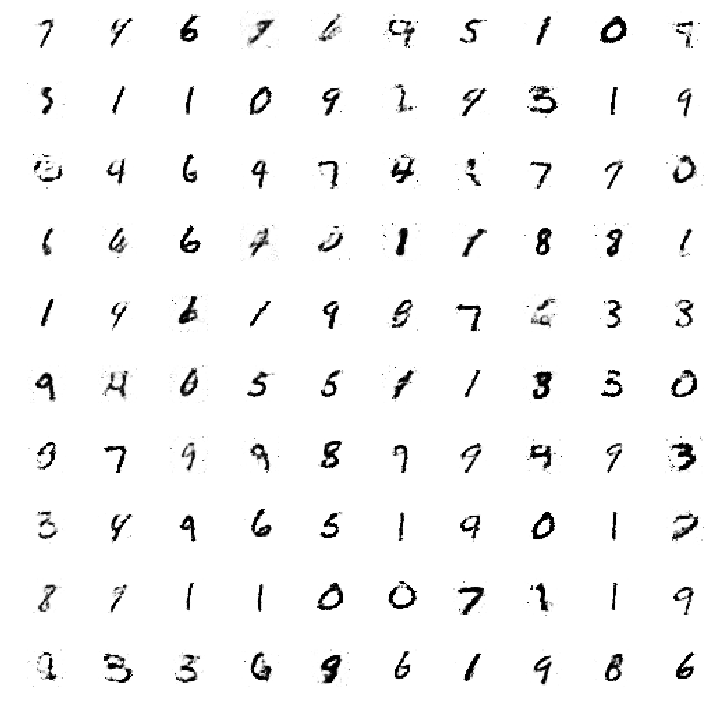

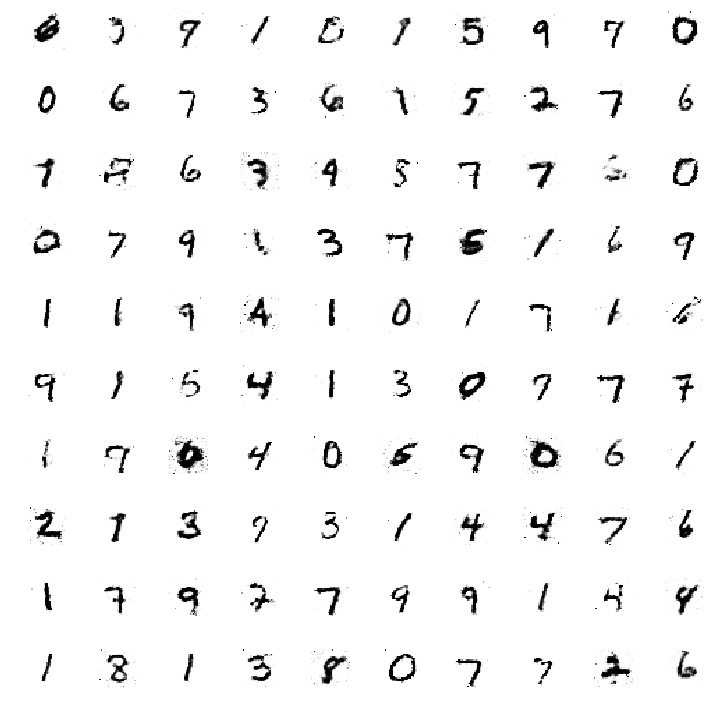

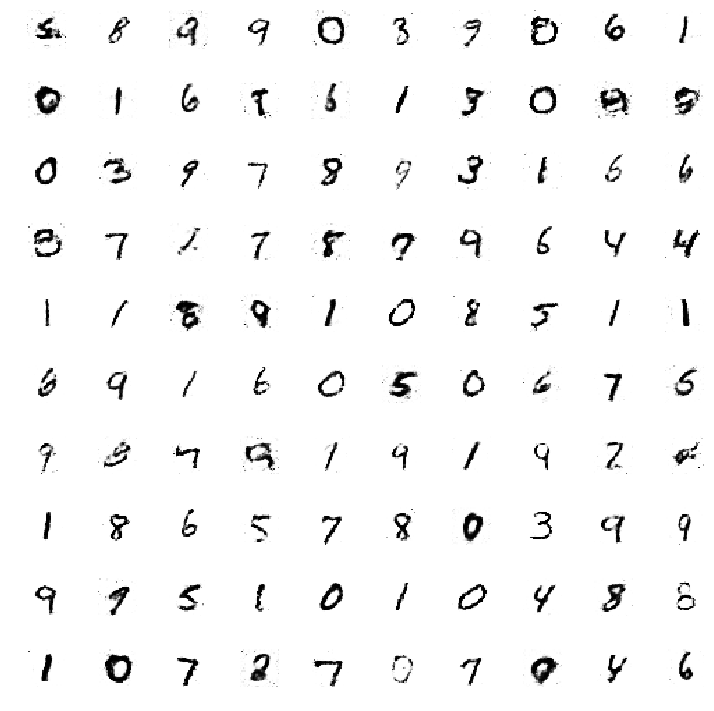

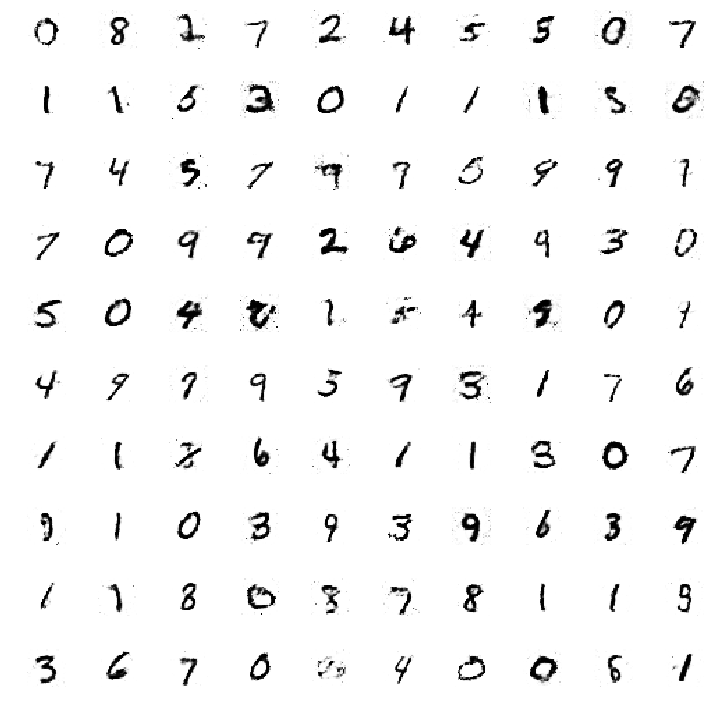

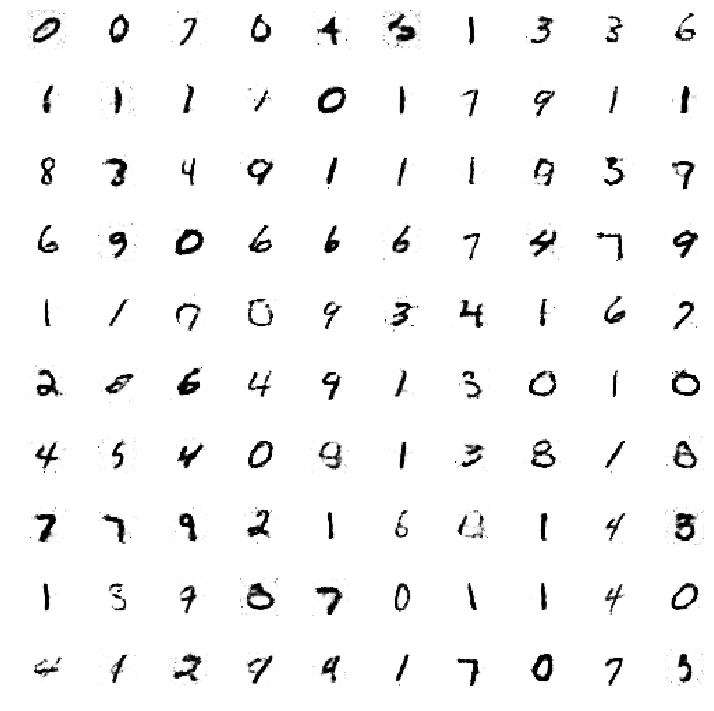

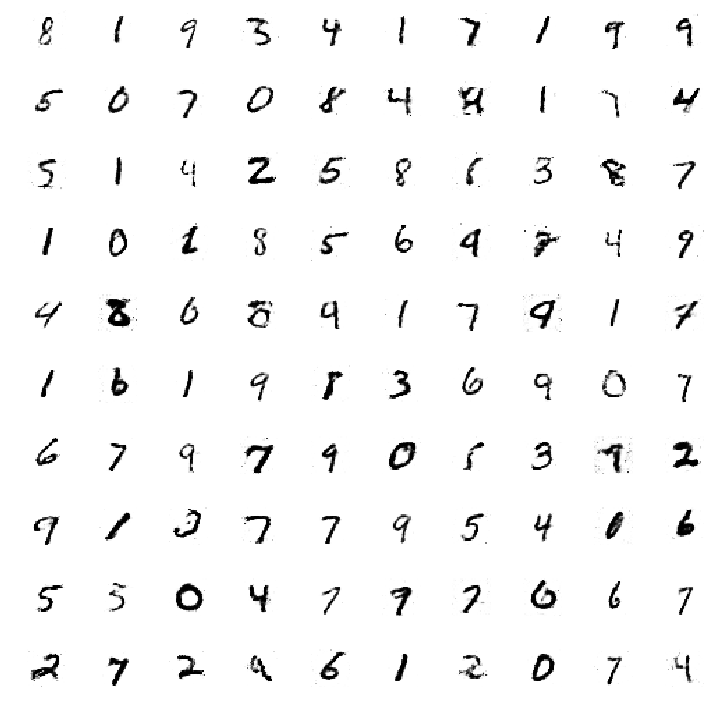

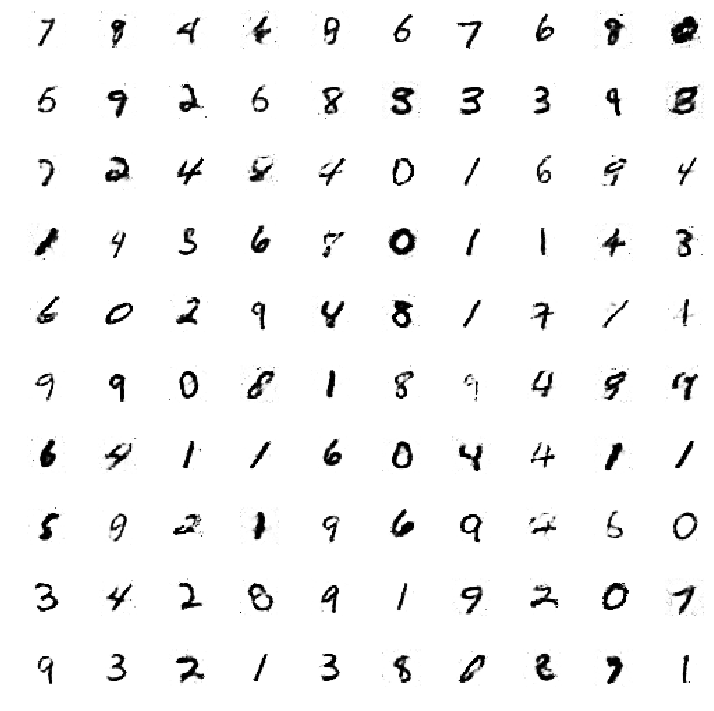

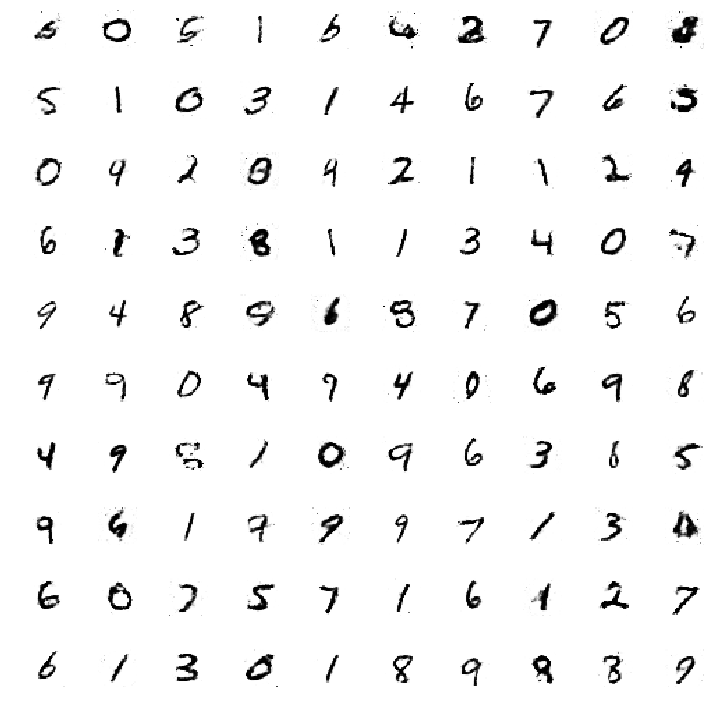

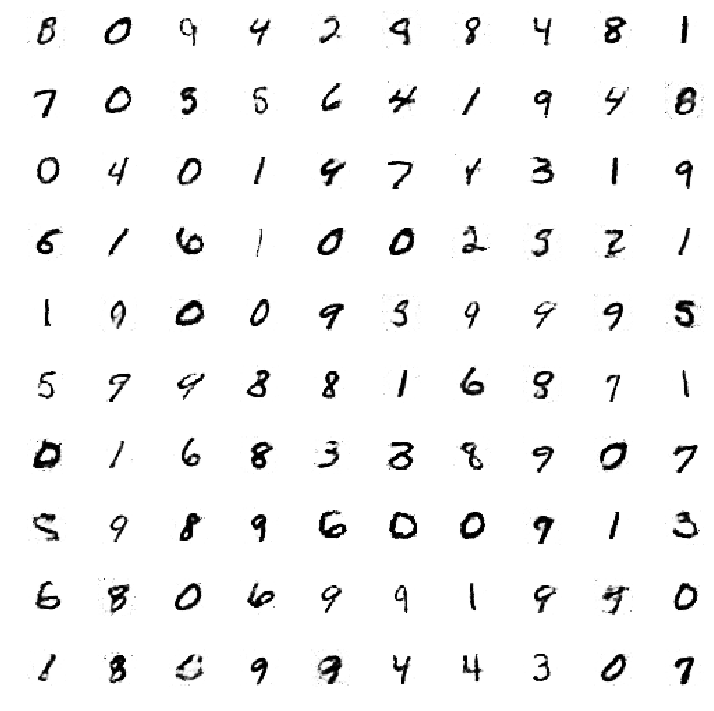

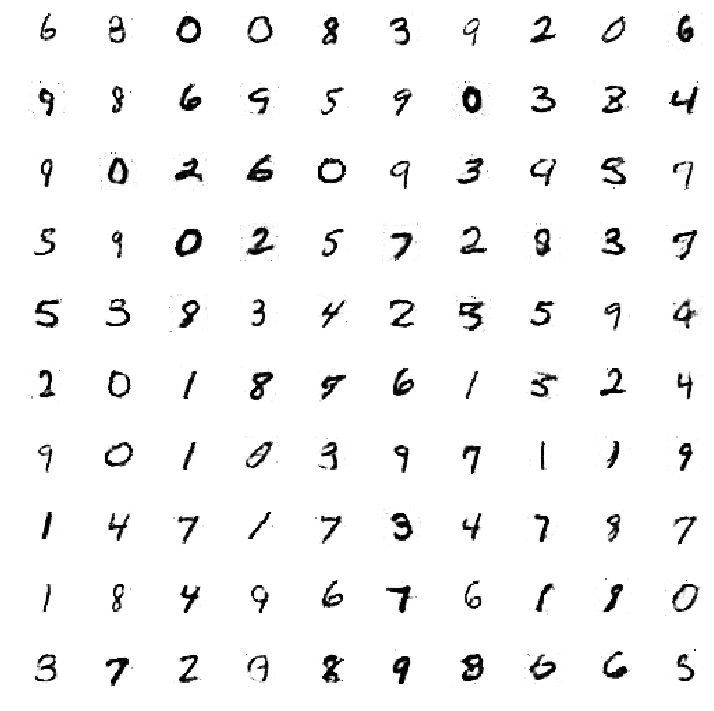

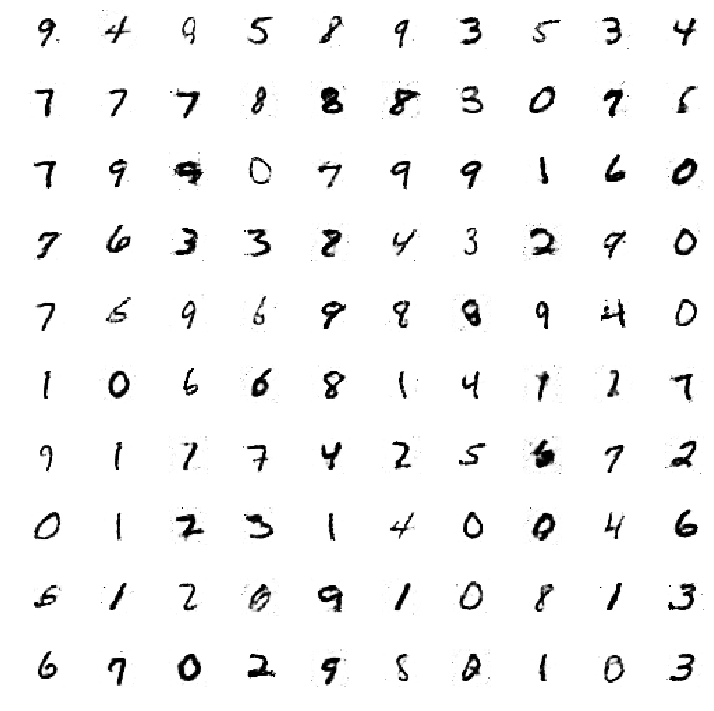

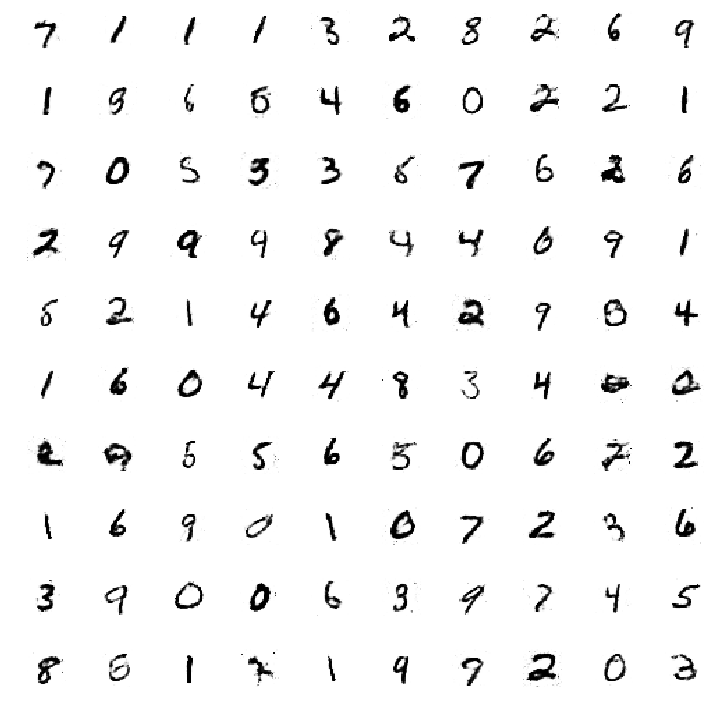

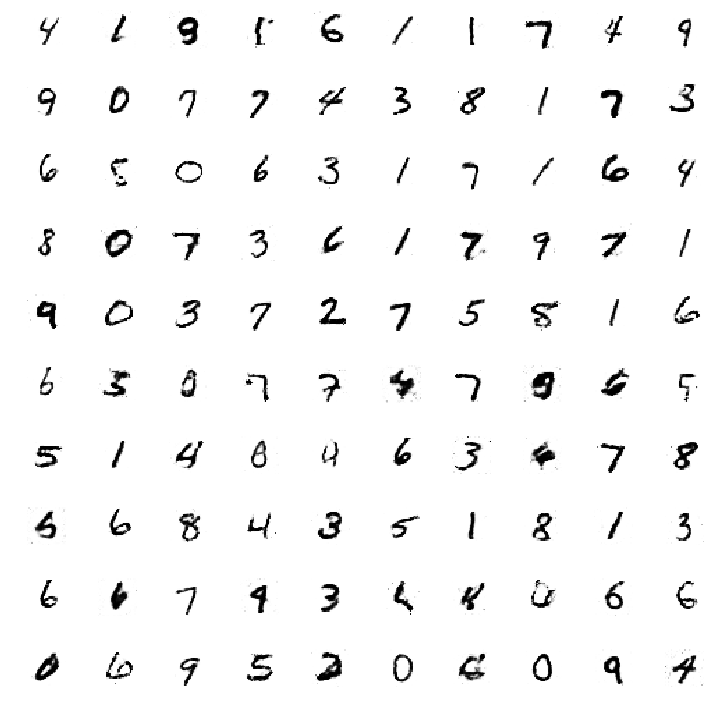

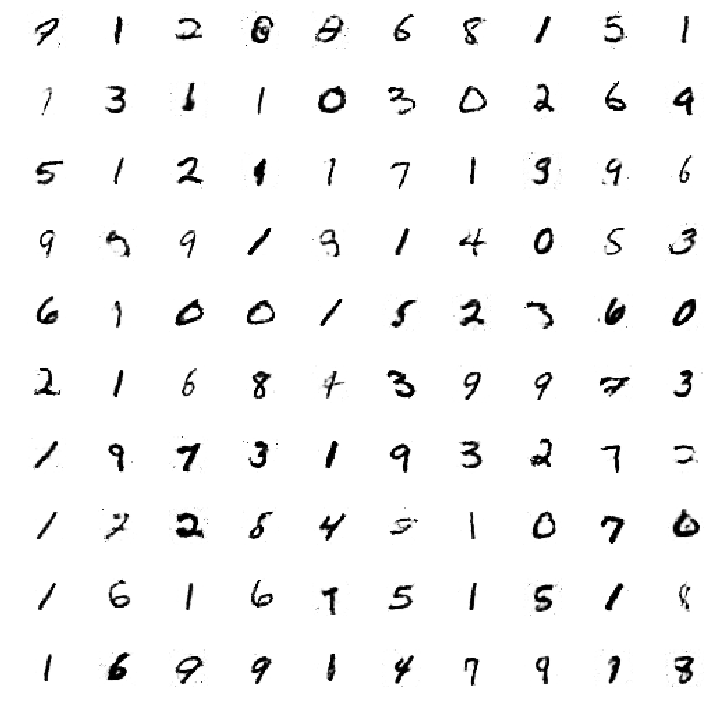

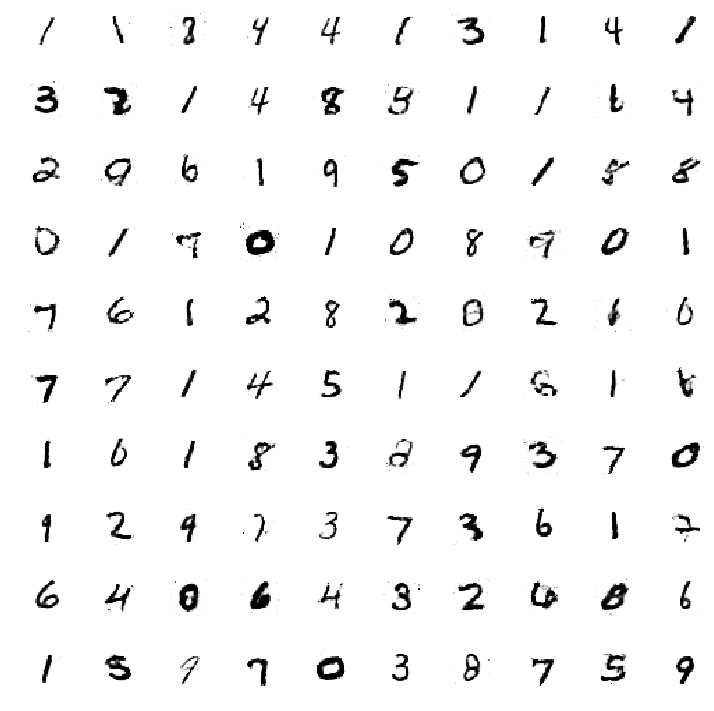

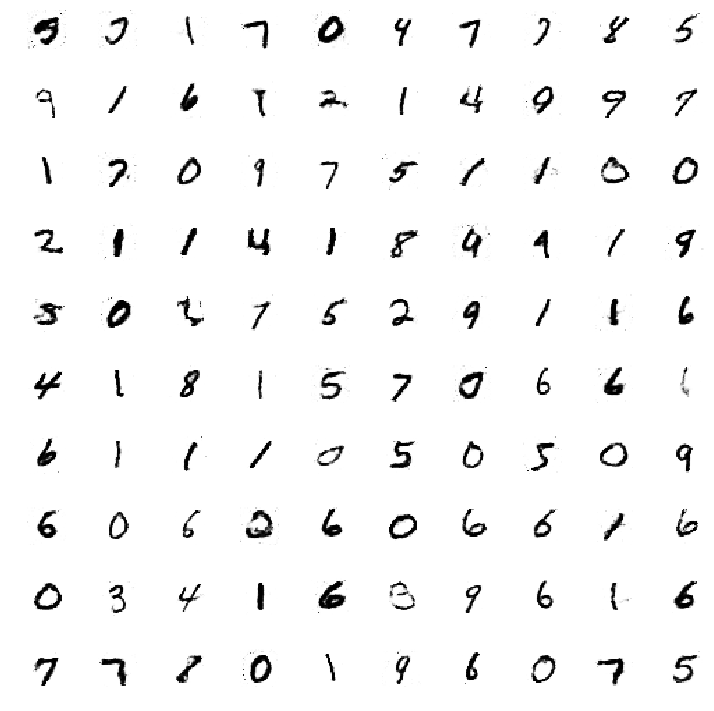

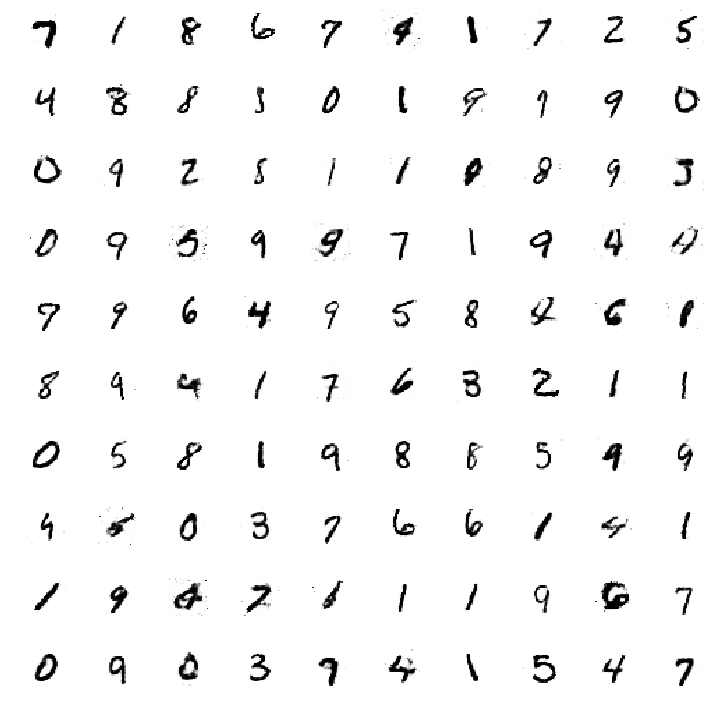

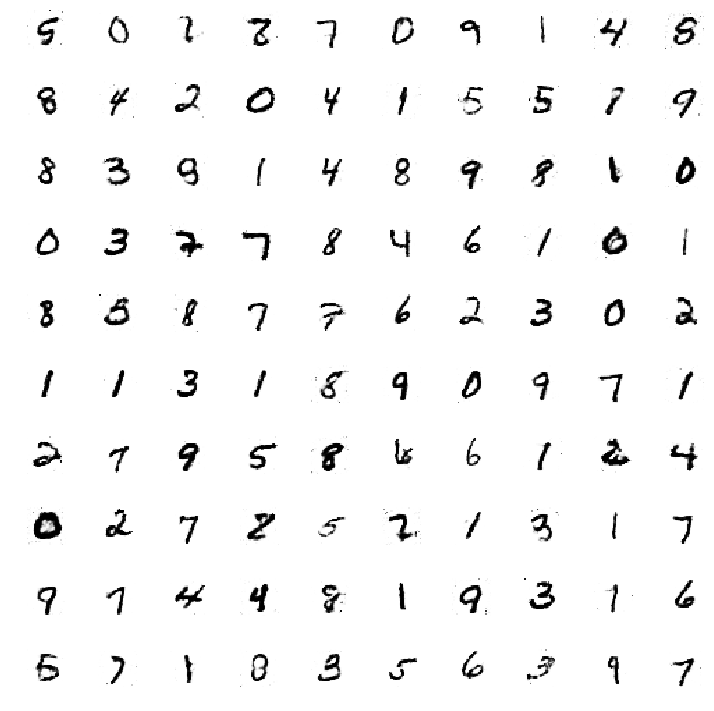

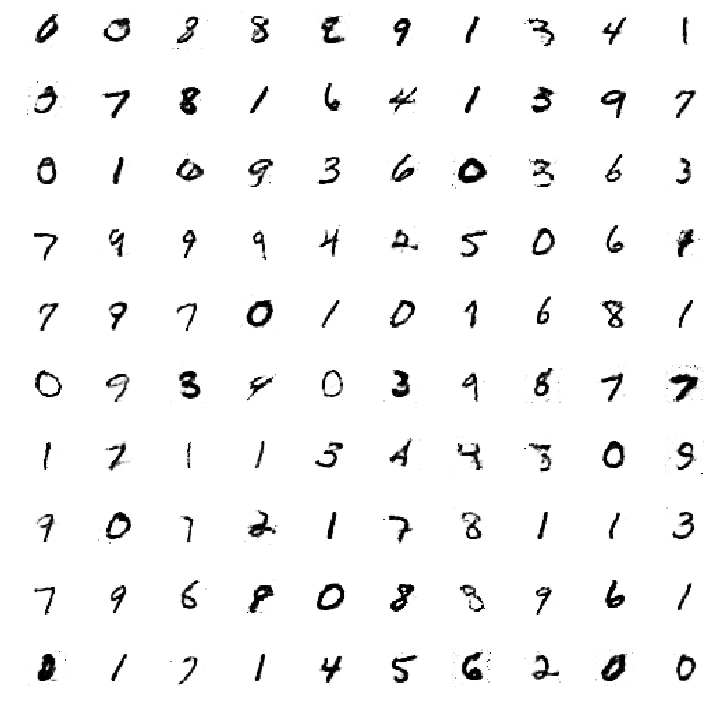

In [ ]:
def train(epochs=1, batch_size=128):
    # Get the training and testing data
    x_train, y_train, x_test, y_test = load_minst_data()
    # Split the training data into batches of size 128
    batch_count = x_train.shape[0] / batch_size

    # Build our GAN network
    adam = get_optimizer()
    generator = get_generator(adam)
    discriminator = get_discriminator(adam)
    gan = get_gan_network(discriminator, random_dim, generator, adam)

    session = keras.backend.get_session()
    init = tf.global_variables_initializer()
    session.run(init)

    for e in xrange(1, epochs+1):
        print '-'*15, 'Epoch %d' % e, '-'*15
        for _ in tqdm(xrange(batch_count)):
            # Get a random set of input noise and images
            noise = np.random.normal(0, 1, size=[batch_size, random_dim])
            image_batch = x_train[np.random.randint(0, x_train.shape[0], size=batch_size)]

            # Generate fake MNIST images
            generated_images = generator.predict(noise)
            X = np.concatenate([image_batch, generated_images])
            # generated images concatenated with true images

            # Labels for generated and real data
            y_dis = np.zeros(2*batch_size)
            # One-sided label smoothing
            y_dis[:batch_size] = 0.9

            # Train discriminator
            discriminator.trainable = True
            discriminator.train_on_batch(X, y_dis)

            # Train generator
            noise = np.random.normal(0, 1, size=[batch_size, random_dim])
            y_gen = np.ones(batch_size)
            discriminator.trainable = False
            gan.train_on_batch(noise, y_gen)

        if e == 1 or e % 20 == 0:
            plot_generated_images(e, generator)

if __name__ == '__main__':
    train(400, 128)